# Examining the behaviour of $\beta(W_m, V_n)$ as $m,n\to\infty$
Our first tests here take a variety of bases and examine $\beta$ along with the error of $u^*$, and look at the properties of $\| u^* - v^* \|$, to tell if there's something we can learn about the convergence of the method, and an optimal value for $n$ given $m$.

As in the previous two worksheets, lets work with two levels of dyadic field. Then we'll construct our basis and do some tests.

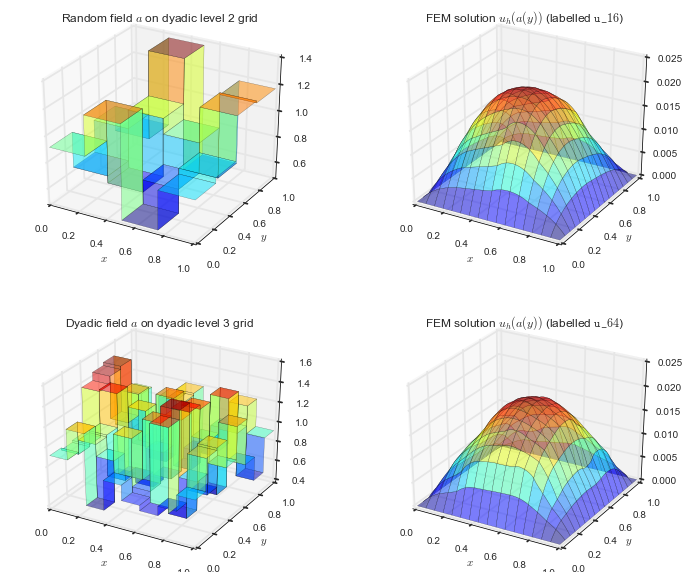

In [1]:
import numpy as np
import importlib
import dyadic_fem as df
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
importlib.reload(df)
%matplotlib inline

fem_div = 6

a_16 = df.make_dyadic_random_field(div=2, a_bar=1.0, c=0.5, seed=1)
fem_16 = df.DyadicFEMSolver(div=fem_div, rand_field=a_16, f=1.0)
fem_16.solve()

a_64 = df.make_dyadic_random_field(div=3, a_bar=1.0, c=0.5, seed=1)
fem_64 = df.DyadicFEMSolver(div=fem_div, rand_field=a_64, f=1.0)
fem_64.solve()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
a_16.plot(ax, title='Random field $a$ on dyadic level 2 grid')
ax = fig.add_subplot(2, 2, 2, projection='3d')
fem_16.u.plot(ax, title='FEM solution $u_h(a(y))$ (labelled $\mathtt{u\_16}$)')
ax = fig.add_subplot(2, 2, 3, projection='3d')
a_64.plot(ax, title='Dyadic field $a$ on dyadic level 3 grid')
ax = fig.add_subplot(2, 2, 4, projection='3d')
fem_64.u.plot(ax, title='FEM solution $u_h(a(y))$ (labelled $\mathtt{u\_64}$)')
plt.show()

### For our first tests we examine $\beta(W_m, V_n)$ as well as $\kappa(\mathbf{G}^T\mathbf{G})^{1/2}$
The idea is to hopefully find some good criteria for finding an optimal $n$ given our measurements $W_m$

In [6]:
m = 64
n = 40
local_width = 2**(fem_div - 4)

Wm = df.make_random_local_integration_basis(m=m, div=fem_div, width=local_width, space='H1')
Wm = Wm.orthonormalise()

Vn, V_fields = df.make_random_basis(n=n, field_div=2, fem_div=fem_div, space='H1')
Vn = Vn.orthonormalise()

u_p_v = Vn.project(fem_16.u)



BP = df.BasisPair(Wm, Vn)
FB = BP.make_favorable_basis()

us_fb, vs_fb, wp_fb, vwp_fb = FB.measure_and_reconstruct(fem_16.u)

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 3, 1, projection='3d')
us_bp.plot(ax, title='Reconstruction $A^*(u)$ using usual method')
ax = fig.add_subplot(1, 3, 2, projection='3d')
us_fb.plot(ax, title='Reconstruction via favorable bases')
ax = fig.add_subplot(1, 3, 3, projection='3d')
(us_bp - us_fb).plot(ax, title='Difference')
ax.dist = 11


(961, 961)

In [7]:

hat_b.G @ np.random.random(hat_b.G.shape[0])


array([  1.68101304e+00,  -1.90585353e-01,   1.86942564e+00,
        -9.73267209e-01,  -6.38537538e-02,   5.28929728e-01,
         1.80246354e-01,   9.19938602e-01,   1.26916095e+00,
        -1.15306306e+00,   5.37853086e-02,   2.98671562e+00,
        -6.67688359e-01,  -1.90326037e+00,   2.64450944e+00,
         9.50423785e-01,  -1.45750784e+00,   2.36604203e+00,
        -1.06047849e+00,   2.33274424e+00,   4.02856109e-01,
        -7.55016087e-01,   4.16418338e-01,  -5.12056860e-01,
         1.70384589e+00,  -9.52695273e-01,   2.12659448e-01,
         2.43091772e+00,   8.40334889e-01,  -2.66191876e-01,
        -7.87318799e-01,   5.52374753e-01,   1.59574497e+00,
         2.95919698e-01,   1.08643731e+00,   4.93710553e-01,
         1.58471202e+00,  -1.51253355e+00,  -9.01395001e-01,
         9.32858524e-01,   1.55005116e+00,   4.25048151e-01,
        -2.84122546e+00,   1.53932191e+00,   2.31488628e+00,
        -1.79971385e+00,  -2.83335088e-01,  -7.65634893e-01,
         6.91465103e-01,